In [9]:
import pandas as pd

csv_file = "C:/Users/zoech/Downloads/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"

df = pd.read_csv(csv_file)

print(df)


                    INDICATOR   
0     Death rates for suicide  \
1     Death rates for suicide   
2     Death rates for suicide   
3     Death rates for suicide   
4     Death rates for suicide   
...                       ...   
6385  Death rates for suicide   
6386  Death rates for suicide   
6387  Death rates for suicide   
6388  Death rates for suicide   
6389  Death rates for suicide   

                                                   UNIT  UNIT_NUM   
0     Deaths per 100,000 resident population, age-ad...         1  \
1     Deaths per 100,000 resident population, age-ad...         1   
2     Deaths per 100,000 resident population, age-ad...         1   
3     Deaths per 100,000 resident population, age-ad...         1   
4     Deaths per 100,000 resident population, age-ad...         1   
...                                                 ...       ...   
6385      Deaths per 100,000 resident population, crude         2   
6386      Deaths per 100,000 resident population, c

In [10]:
#Find number of elements
import csv

csv_file = "C:/Users/zoech/Downloads/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"

num_elements = 0

with open(csv_file, 'r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        num_elements += 1

print(f"Number of elements in file: {num_elements}")


Number of elements in file: 6391


In [11]:
#Find number of bytes
import os

file_path = "C:/Users/zoech/Downloads/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"

if os.path.exists(file_path):
    file_size = os.path.getsize(file_path)
    print(f"Size of file: {file_size} bytes")
else:
    print(f"{file_path} does not exist.")


Size of file: 1084430 bytes


In [12]:
# View first 5 rows of dataframe
df[:5]

a= df[['AGE', 'AGE_NUM',  'YEAR', 'ESTIMATE']]
a.head(20)

last_20_rows = a.tail(20)
last_20_rows

,AGE,AGE_NUM,YEAR,ESTIMATE
6370,15-24 years,2.0,2018,17.3
6371,25-44 years,3.0,2018,19.5
6372,45-64 years,4.0,2018,11.6
6373,65 years and over,5.0,2018,8.9
6374,15-24 years,2.0,2018,16.2
6375,25-44 years,3.0,2018,15.8
6376,45-64 years,4.0,2018,14.0
6377,65 years and over,5.0,2018,15.0
6378,15-24 years,2.0,2018,6.7
6379,25-44 years,3.0,2018,10.4


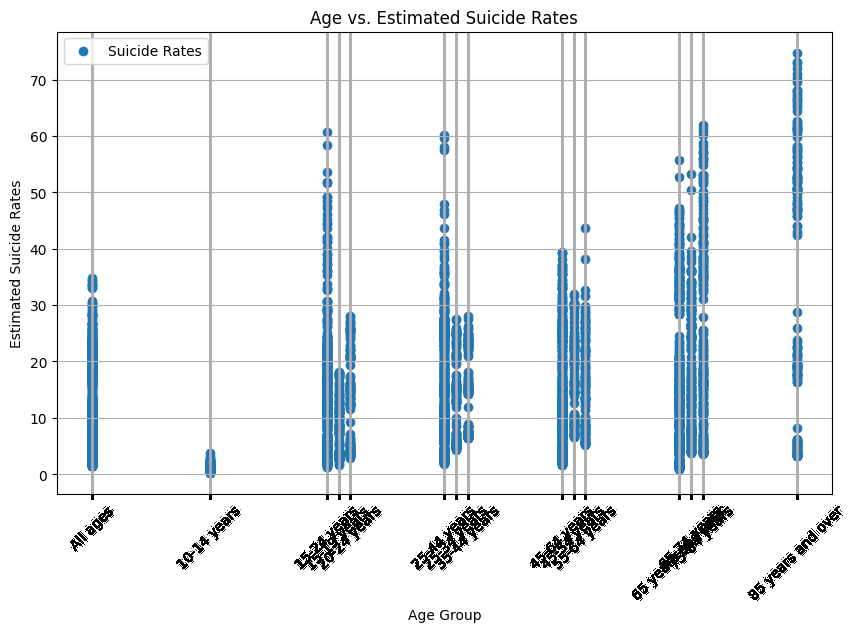

In [13]:
import matplotlib.pyplot as plt


# visualization with age , year, and suicide rate

# Select specific columns from the DataFrame

a = df[['AGE', 'AGE_NUM', 'ESTIMATE']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(a['AGE_NUM'], a['ESTIMATE'], label='Suicide Rates')

# Set axis labels and title
plt.xlabel('Age Group')
plt.xticks(a['AGE_NUM'], a['AGE'], rotation=45)  # Use AGE as x-axis labels
plt.ylabel('Estimated Suicide Rates')
plt.title('Age vs. Estimated Suicide Rates')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()


In [77]:
df_sorted = df.sort_values(by="ESTIMATE", ascending=False)


In [81]:
selected_columns = df_sorted[["STUB_LABEL", "ESTIMATE"]]


In [82]:
selected_columns = selected_columns.dropna()


In [83]:
selected_columns.reset_index(drop=True, inplace=False)


,STUB_LABEL,ESTIMATE
0,Male: White: 85 years and over,74.8
1,Male: White: 85 years and over,73.2
2,Male: White: 85 years and over,72.9
3,Male: White: 85 years and over,72.1
4,Male: White: 85 years and over,71.0
...,...,...
5479,Female: 10-14 years,0.5
5480,Female: 10-14 years,0.4
5481,10-14 years,0.3
5482,Female: 10-14 years,0.3


In [84]:
data_for_clustering = selected_columns["ESTIMATE"].values.reshape(-1, 1)


In [85]:
num_clusters = 3


In [86]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data_for_clustering)


C:\Users\zoech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
selected_columns["Cluster"] = kmeans.labels_


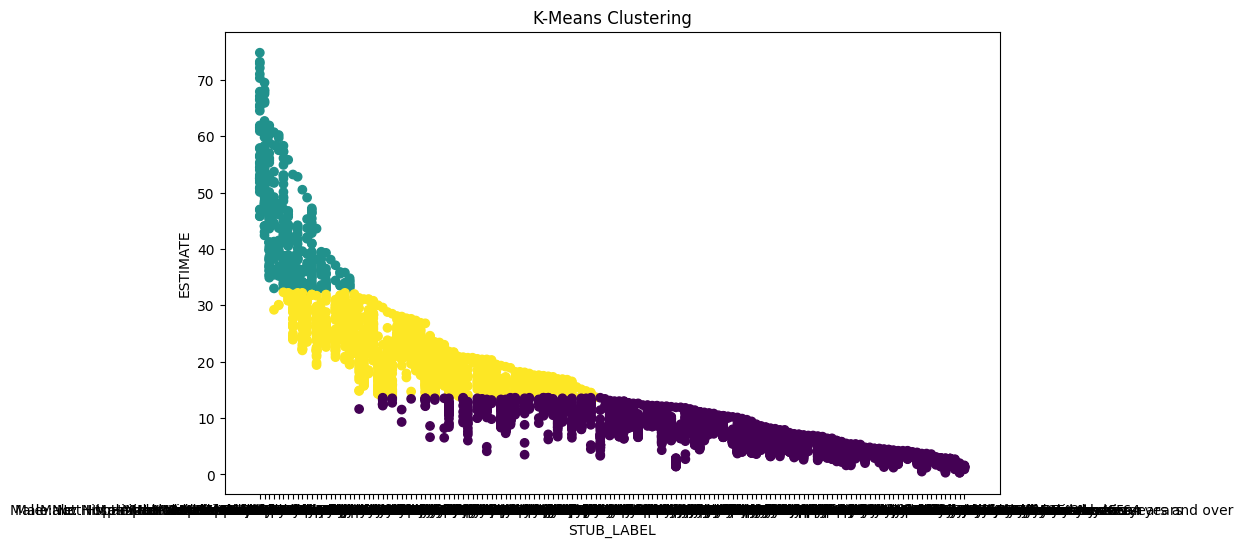

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(selected_columns["STUB_LABEL"], selected_columns["ESTIMATE"], c=selected_columns["Cluster"])
plt.xlabel("STUB_LABEL")
plt.ylabel("ESTIMATE")
plt.title("K-Means Clustering")
plt.show()